## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer:
1. Is there any association between personality traits to left-handedness?
2. Is there any traits that left-handed people enjoy more than right handed people?
3. Does left handed people like to decor more than right handed people?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [540]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
pd.set_option('display.max_columns',None)

In [541]:
df = pd.read_csv('./data.csv',sep='\t')

### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer:
1. Having a NDA (Non Disclosure Agreement) prior to conducting the survey
2. Allowing respondent to partcipate anonymously
3. Allowing respondent to leave blank on the personal question which he/she uncomfortable to answer

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [542]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,1,1,5,5,5,1,5,1,5,1,5,1,1,1,5,5,5,1,5,1,1,1,1,5,5,1,1,1,5,5,5,1,5,1,91,232,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,2,5,3,4,1,4,1,1,1,5,2,4,4,4,1,2,1,2,1,3,1,5,2,4,4,4,4,4,1,3,1,4,4,5,17,247,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,4,5,4,3,4,1,2,3,1,3,3,3,4,5,3,2,2,2,1,4,3,3,4,4,2,2,4,2,1,4,2,2,2,2,11,6774,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,1,3,2,3,1,5,2,2,5,5,2,3,2,2,1,4,1,1,1,3,4,1,3,5,5,1,3,4,1,2,1,1,1,3,14,1072,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,1,1,5,5,5,1,5,1,5,2,5,1,5,1,5,5,5,1,5,1,5,1,5,5,5,1,1,1,5,5,5,1,5,1,10,226,US,2,1,22,3,1,1,3,2,3


In [543]:
df.shape

(4184, 56)

In [544]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [545]:
df.describe(include='all')

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,2.748805,2.852772,2.657505,3.334130,3.168021,2.930210,2.564771,3.424952,2.928537,3.639818,2.867591,3.595124,3.861138,3.337237,1.999761,3.001434,2.730641,2.624044,2.543738,2.894359,3.002151,2.869503,2.741874,3.022228,3.074092,2.610660,3.465344,2.798757,2.569312,2.984226,3.385277,2.704828,2.676386,2.736616,347.808556,479.994503,NaN,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,1.443078,1.556284,1.559575,1.522866,1.501683,1.575544,1.619010,1.413236,1.493122,1.414569,1.360858,1.354475,1.291425,1.426095,1.290747,1.480610,1.485883,1.481709,1.611428,1.477968,1.420032,1.659141,1.405670,1.562694,1.546400,1.409707,1.521460,1.413584,1.621772,1.483752,1.423055,1.544345,1.523097,1.471845,5908.901681,3142.178542,NaN,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,NaN,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,6.000000,186.000000,NaN,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.0000

In [546]:
# Check for NULL values
df.isnull().sum()

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
Q28            0
Q29            0
Q30            0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
Q43            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
religion       0
hand           0
dtype: int64

## Observed unusual data for age

In [547]:
df[df['age']>100]['age'] #3 items potentially have error input

2075      123
2137      409
2690    23763
Name: age, dtype: int64

In [548]:
#since 3 our of 4184 samples is almost negligible
df.loc[df['age']>100,'age']=np.nan

In [549]:
df['age'].isnull().sum()

3

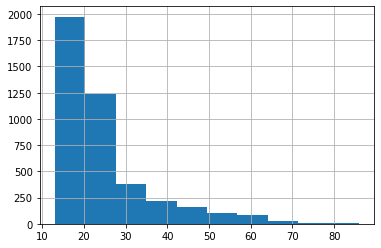

In [550]:
df['age'].dropna().astype(int).hist(); #most of our correspondents are below 25 years old

## Check the target 

In [551]:
df['hand'].value_counts() #1 = Right Handed, 2 = Left Handed, 3 = Both, 0 = No response

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [552]:
df = df[df['hand']!=0]

1    3542
2     452
3     179
Name: hand, dtype: int64

In [553]:
df.loc[df['hand']==3,'hand'] = 2

df['hand'] =df['hand'].map(lambda x: 1 if ((x==2)|(x==3))) #assuming the one with both can be calculated as left handed = 1, while right handed and no reponse (assumed to be not left handed)=0

In [554]:
df['hand'].value_counts()

1    3542
2     631
Name: hand, dtype: int64

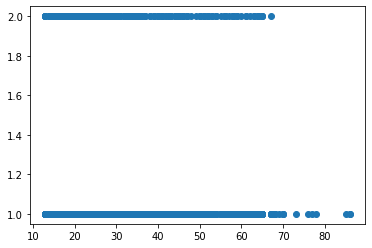

In [555]:
plt.scatter(df['age'], df['hand'])

## EDA: Plot Heatmap of Correlation Matrix

<AxesSubplot:>

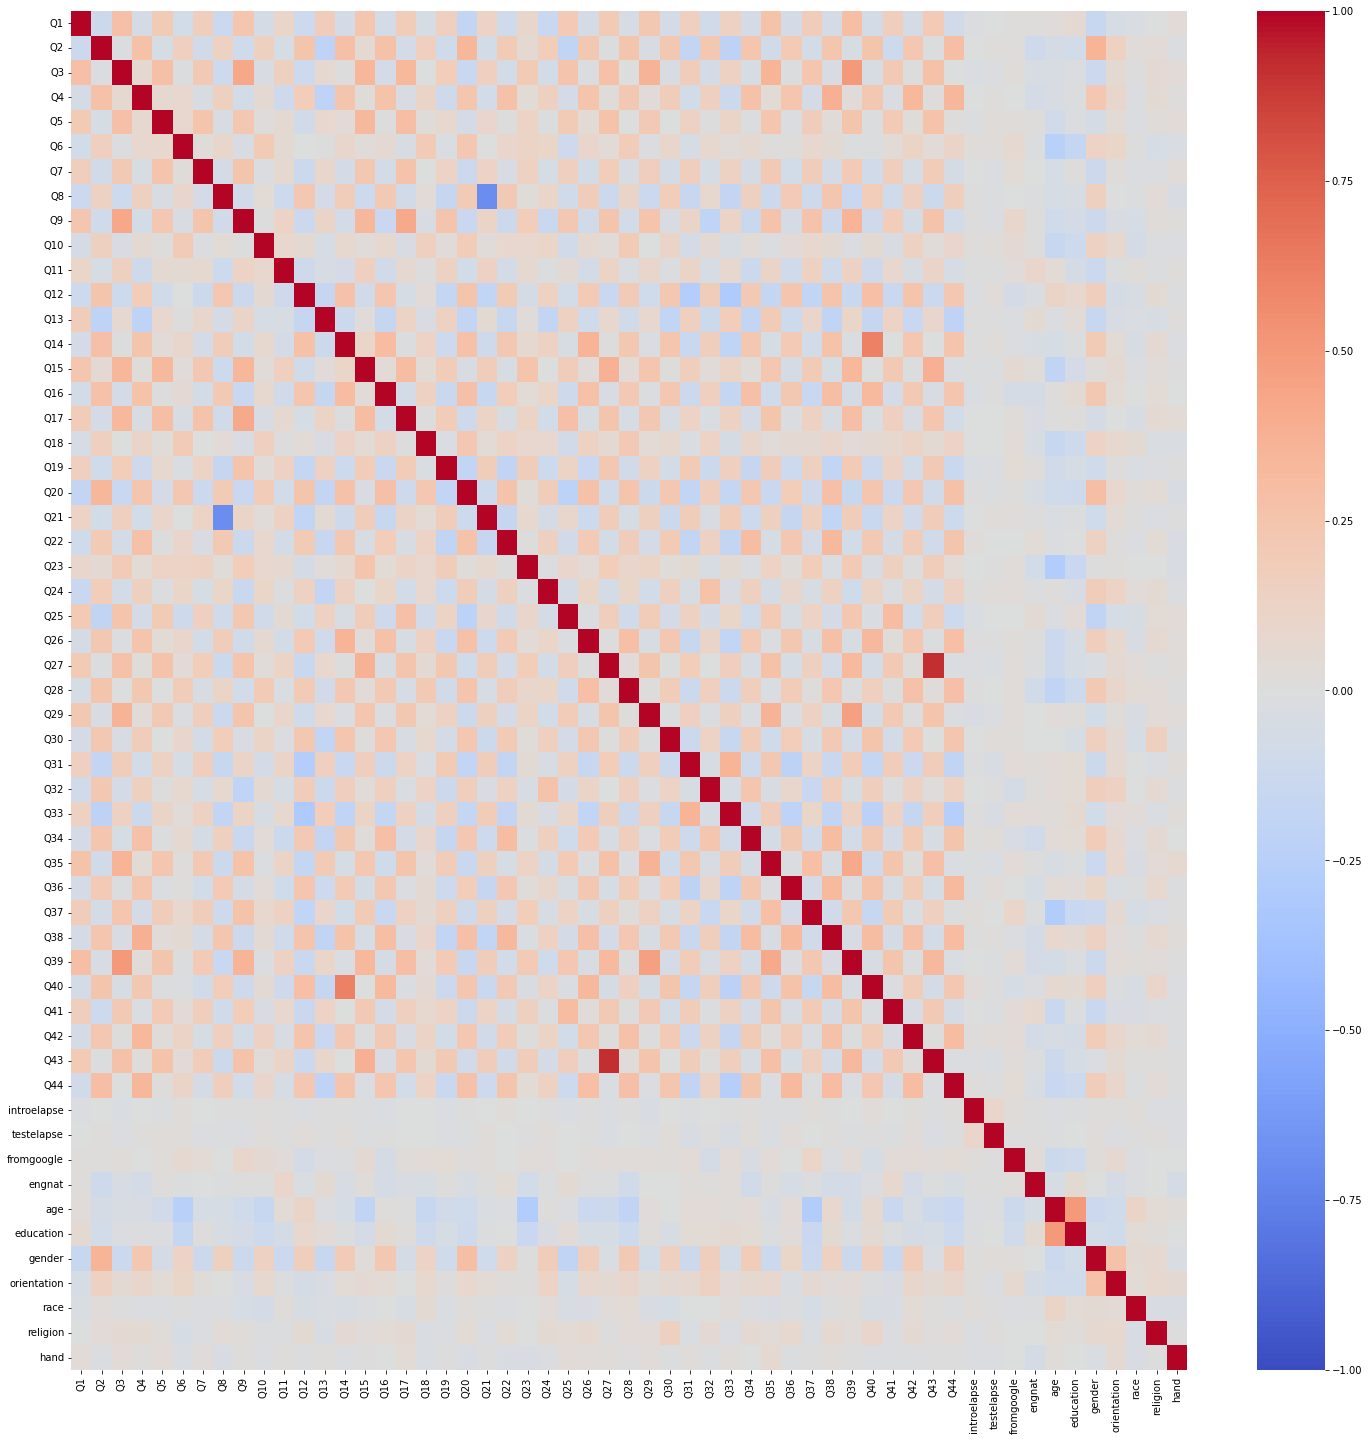

In [556]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=False,vmin=-1,vmax=1,cmap='coolwarm')

In [557]:
df.corr()['hand'].sort_values()

engnat        -0.054964
Q8            -0.034042
Q23           -0.033173
Q20           -0.032990
race          -0.032796
Q22           -0.032774
Q18           -0.026840
Q6            -0.026208
gender        -0.025835
Q14           -0.021733
Q40           -0.021517
Q2            -0.021204
Q10           -0.020887
Q24           -0.020780
introelapse   -0.019016
testelapse    -0.018841
Q30           -0.014877
Q36           -0.013445
Q12           -0.010641
Q41           -0.010196
Q32           -0.010018
Q42           -0.009403
fromgoogle    -0.007662
Q34           -0.003711
education     -0.002107
Q16           -0.000424
Q15            0.000514
Q19            0.001304
religion       0.001742
Q39            0.002737
Q28            0.003164
Q21            0.003180
Q43            0.005264
Q37            0.006152
Q44            0.007356
Q9             0.008059
Q4             0.008252
Q11            0.010738
Q13            0.012476
Q27            0.016619
Q31            0.019036
Q38            0

In [558]:
df.corr()['hand'].sort_values(ascending=False)

hand           1.000000
Q35            0.065766
orientation    0.055784
Q17            0.039154
Q1             0.037260
Q3             0.035326
Q25            0.034370
Q5             0.032589
Q29            0.027802
Q7             0.026990
Q26            0.026839
Q33            0.023142
age            0.020323
Q38            0.019543
Q31            0.019036
Q27            0.016619
Q13            0.012476
Q11            0.010738
Q4             0.008252
Q9             0.008059
Q44            0.007356
Q37            0.006152
Q43            0.005264
Q21            0.003180
Q28            0.003164
Q39            0.002737
religion       0.001742
Q19            0.001304
Q15            0.000514
Q16           -0.000424
education     -0.002107
Q34           -0.003711
fromgoogle    -0.007662
Q42           -0.009403
Q32           -0.010018
Q41           -0.010196
Q12           -0.010641
Q36           -0.013445
Q30           -0.014877
testelapse    -0.018841
introelapse   -0.019016
Q24           -0

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: Classification problem as the answer comes in label where 1 means Disagree, 3 means Neutral and 5 means Agree

The target (y-value) will be 0 for *not* left-handed and 1 left-handed, therefore, this will be a classification problem because regression problem is on numerical target.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: K-nearest neigbors which is a model relying on the distance of our features value, thus, standardization is important so that feartures will be validated on similar measures. When one feature is bigger than the other (tens vs thousands), it will dominate the distance for KNN determination.

Condition: we will do before regression (Lasso, Ridge), before doing knn
Example: In studying student's university acceptance, there are 2 metrics with different scale such as SAT score (out of 1600) and ACT score (out of 36). SAT will dominate the distance. Hence, we will need to standardize the data before using it to train our model

### 7. Give an example of when we might not standardize our variables.

Answer: Logistic Regression

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: Yes, we should standardize our predictor variables if we would like to use all features including the age. However, if we would like to use the questionnaire's answers, I don't think we need to standardize it.

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: 
First, we cleaned up with the y -value column. <br>
Second, we cleaned up the age > 100 as these might be due to input error by putting np.nan and we will drop it on our modelling as this is less than 1% of our data

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: Looking at the number of samples we have, k=4 might be too small as this might lead to overfitting because although our model will be flexible in catching the signal, it might capture noise data as well. If the k value is too small, the noise will have higher influence on our data.

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [559]:
# Define x and y
X = df.dropna().drop(columns=['introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand']) #only checking on personal trait
y = df.dropna()['hand']

In [560]:
#train test split with default training size
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [561]:
#doing scaling just to make sure KNN works properly
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test) #only fit the standard scaler so that there is no data leakage between training and test set

In [562]:
#instantiate knn
knn = KNeighborsClassifier()

In [563]:
k_values = [3,5,15,25]

for k in k_values:
    print('K: %s ----------------------------------------------' % k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = np.mean(cross_val_score(knn, X_train,y_train,cv=10))
    print('Cross Validated mean score: ',scores)
    knn.fit(X_train,y_train)
    model_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    print('Model Score: ',model_score)
    print('Test Score: ',test_score)

K: 3 ----------------------------------------------
Cross Validated mean score:  0.796464728201255
Model Score:  0.8696043165467626
Test Score:  0.807185628742515
K: 5 ----------------------------------------------
Cross Validated mean score:  0.8207414000827175
Model Score:  0.8510191846522782
Test Score:  0.8407185628742515
K: 15 ----------------------------------------------
Cross Validated mean score:  0.8453246659833485
Model Score:  0.8459232613908872
Test Score:  0.859880239520958
K: 25 ----------------------------------------------
Cross Validated mean score:  0.8462237686788585
Model Score:  0.8462230215827338
Test Score:  0.859880239520958


Can be seen that when K is too small it tends to overfit as model score is much higher in K=3 compare to K>5


Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: By default, there is L2 regression applied which is Ridge Regularization because the default of C=1.0.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer: It depends on the features whether it is on the smale scale or not

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [564]:
#For Ridge,l2 penalty term. C which is the inverse of alpha so when alpha is 1, C=1, whereas, when alpha is 10, C=1/10
alpha = [1,10]

for a in alpha:
    print('Penalty Term: Ridge with alpha of: ',a)
    logreg= LogisticRegression(penalty='l2',C=(1/a))
    logreg.fit(X_train,y_train)
    model_reg_score = logreg.score(X_train,y_train)
    test_reg_score = logreg.score(X_test,y_test)
    print('Model Accuracy: ',model_reg_score)
    print('Test Accuracy: ',test_reg_score)
    print('----------------------------------------------------')

Penalty Term: Ridge with alpha of:  1
Model Accuracy:  0.8462230215827338
Test Accuracy:  0.859880239520958
----------------------------------------------------
Penalty Term: Ridge with alpha of:  10
Model Accuracy:  0.8462230215827338
Test Accuracy:  0.859880239520958
----------------------------------------------------


In [565]:
#For Lasso,l1 penalty term. C which is the inverse of alpha so when alpha is 1, C=1, whereas, when alpha is 10, C=1/10
alpha = [1,10]

for a in alpha:
    print('Penalty Term: Lasso with alpha of: ',a)
    logreg= LogisticRegression(penalty='l1',C=(1/a),solver='liblinear')
    logreg.fit(X_train,y_train)
    model_reg_score = logreg.score(X_train,y_train)
    test_reg_score = logreg.score(X_test,y_test)
    print('Model Accuracy: ',model_reg_score)
    print('Test Accuracy: ',test_reg_score)
    print('-----------------------------------------------------\n')

Penalty Term: Lasso with alpha of:  1
Model Accuracy:  0.8462230215827338
Test Accuracy:  0.859880239520958
-----------------------------------------------------

Penalty Term: Lasso with alpha of:  10
Model Accuracy:  0.8462230215827338
Test Accuracy:  0.859880239520958
-----------------------------------------------------



---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer: X is very broad and as per the multicollinearity, we can see some questions correlate with each other

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

Answer:
|Model|k/alpha|Model Score|Test Score|
|---|---|---|---|
|KNN|3|86.96|80.72|
|KNN|5|85.10|84.07|
|KNN|15|84.59|85.99|
|KNN|25|84.62|85.99|
|Lasso|1|84.62|85.99|
|Lasso|10|84.62|85.99|
|Ridge|1|84.62|85.99|
|Ridge|10|84.62|85.99|

### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer: k=3 is has quite higher score on the model than the test, this can be an indication on overfitting by using too small k- value for KNN model

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: If k is too small, there will be higher variance as we will be weighing more on the noise as well. As k increases, variance will be lower but on the other hand bias will increase as this is a bias-variance tradeoff phenomena

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:
3 things to solve overfitting:
1. Get more data: more rows of relevant features
2. Reduce the complexity of our model by removing irrelevant 
3. Regularization

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer: The difference between model and test is quite small, cannot deduce if there is any overfitting

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: By right, as C increases (alpha is the inverse so alpha decreases), beta should increase, that means small change in our feature will impact y value so it will have higher variance and lower bias.

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer: no effect on the score. 

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: 
1. Get more data: more rows of relevant features
2. Reduce the complexity of our model by removing irrelevant 
3. Reduce C

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: I would choose logistic regression as Lasso will be able to check which feature with very low relevancy.

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

In [566]:
logreg1= LogisticRegression(penalty='l1',C=1,solver='liblinear')
logreg1.fit(X_train,y_train)
model_reg_score = logreg1.score(X_train,y_train)
test_reg_score = logreg1.score(X_test,y_test)
print('Model Accuracy: ',model_reg_score)
print('Test Accuracy: ',test_reg_score)

Model Accuracy:  0.8462230215827338
Test Accuracy:  0.859880239520958


In [567]:
logreg1.coef_

array([[ 0.05040839,  0.        ,  0.02528225,  0.01993773,  0.00610524,
        -0.03561877,  0.04448598, -0.17501871,  0.01496297, -0.01249387,
         0.00726762, -0.02195253, -0.02989426, -0.07821921,  0.01801419,
         0.04141022,  0.048566  , -0.04685402, -0.00502436, -0.07262394,
        -0.12462037, -0.1017056 , -0.09063385, -0.04603525,  0.08079146,
         0.1575044 ,  0.11786402,  0.04208586,  0.04547329,  0.        ,
        -0.02096961, -0.01690011,  0.01899318,  0.02151405,  0.15712531,
        -0.0940185 , -0.01171334,  0.12144474, -0.08671306, -0.05045226,
        -0.09080533, -0.03161921, -0.14290238,  0.10092076]])

Answer:


### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer:

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

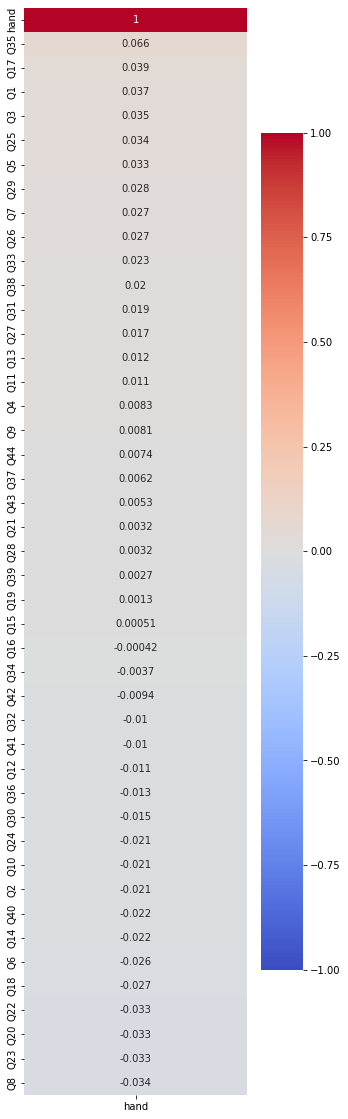

In [568]:
plt.figure(figsize=(5,20))
traits = df.iloc[:,:44]
traits['hand'] = df['hand']
sns.heatmap(traits.corr()[['hand']].sort_values('hand',ascending=False),annot=True,cmap='coolwarm',vmin=-1,vmax=1);

Answer:
1. Is there any association between personality traits to left-handedness?
    I would say personality traits are not a good indicator to predict whether a person is left handed or not
2. Is there any traits that left-handed people enjoy more than right handed people? I wouldn't say there is because the correlation strength is less than 10% (Q35	I have taken apart machines just to see how they work.)
3. Does left handed people like to decor more than right handed people? No, there is no correlation that supports this


### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)